In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!gdown 1yEtv0jHCbj_w9zZAbZKCIOjJ6kL3bgSq

Downloading...
From: https://drive.google.com/uc?id=1yEtv0jHCbj_w9zZAbZKCIOjJ6kL3bgSq
To: /content/DatasetSPYT.xlsx
100% 1.06M/1.06M [00:00<00:00, 87.8MB/s]


In [74]:
df = pd.read_excel('DatasetSPYT.xlsx', sheet_name='Sheet1')

In [7]:
df.head(5)

,id,Name,AlbumName,Artist,ReleaseDate,PopularityScore,Duration,Genre,Danceability,Acousticness,...,Loudness,Speechiness,Tempo,Valence,TimeSignature,title,channelTitle,likeCount,viewCount,publishedAt
0,0,Sparks,Parachutes,Coldplay,2000-07-10,82,227093,"permanent wave,pop",0.371,0.74800,...,-10.506,0.0281,102.617,0.165,3.0,Sparks,Coldplay,838997,79464550,2015-07-04
1,1,The Real Slim Shady,The Marshall Mathers LP,Eminem,2000-05-23,85,284200,"detroit hip hop,hip hop,rap",0.949,0.03020,...,-4.244,0.0572,104.504,0.760,4.0,Eminem - The Real Slim Shady (Official Video -...,EminemMusic,6631203,793874704,2010-09-15
2,2,Without Me,The Eminem Show,Eminem,2002-05-26,86,290320,"detroit hip hop,hip hop,rap",0.908,0.00286,...,-2.827,0.0738,112.238,0.662,4.0,Eminem - Without Me (Official Music Video),EminemMusic,11703552,1620880321,2009-06-17
3,3,Till I Collapse,The Eminem Show,"Eminem,Nate Dogg",2002-05-26,83,297786,"detroit hip hop,hip hop,rap,g funk,gangster ra...",0.548,0.06220,...,-3.237,0.1860,171.447,0.100,4.0,Till I Collapse,EminemMusic,2133701,256243285,2018-07-30
4,4,Yellow,Parachutes,Coldplay,2000-07-10,86,266773,"permanent wave,pop",0.429,0.00239,...,-7.227,0.0281,173.372,0.285,4.0,Coldplay - Yellow (Official Video),Coldplay,4695131,851039140,2011-05-30


In [30]:
# group by the channel name and find the sum of views
views_by_channel = df.groupby('channelTitle')['viewCount'].sum()

# sort the series in descending order
views_by_channel = views_by_channel.sort_values(ascending=False)

views_by_channel.head(10)

channelTitle
Justin Bieber                                  30208507669
Ed Sheeran                                     26500606648
Taylor Swift                                   20838212559
Katy Perry                                     20221909716
Rihanna                                        18390879016
The Weeknd                                     16468703295
EminemMusic                                    14719184647
Bruno Mars                                     14698835172
Pinkfong Baby Shark - Kids' Songs & Stories    12494665455
Ariana Grande                                  12363584706
Name: viewCount, dtype: int64

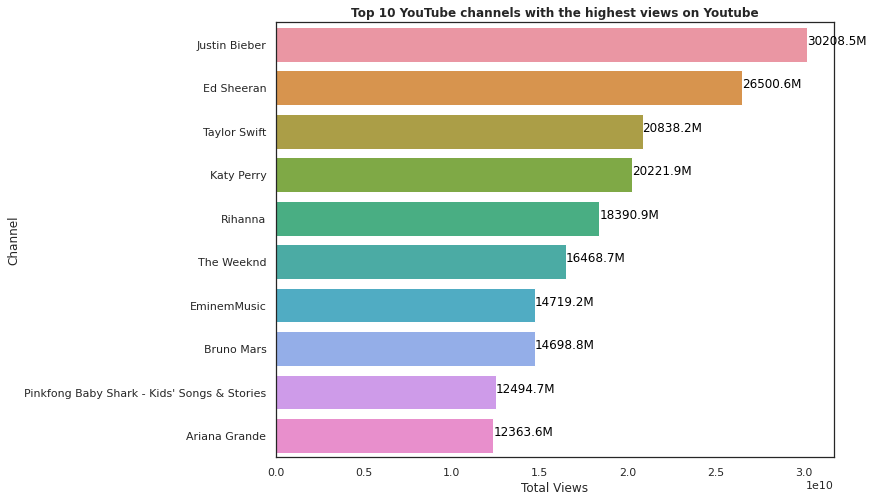

In [96]:
# create a horizontal bar plot using seaborn
sns.set_style("white")
sns.set_palette("husl", 8)
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=views_by_channel[:10], y=views_by_channel.index[:10])
ax.set_xlabel('Total Views')
ax.set_ylabel('Channel')
ax.set_title('Top 10 YouTube channels with the highest views on Youtube', fontweight='bold')

# loop through the top 10 channels and add the view count as a label above each bar
for i, v in enumerate(views_by_channel[:10]):
    ax.text(v , i , '{:.1f}M'.format(v/1000000), color='black')

plt.show()

In [19]:
# split the Genre column by comma and create a new DataFrame
genre_df = df['Genre'].str.split(',', expand=True)

# stack the columns of the new DataFrame to create a single column of genres
genre_series = genre_df.stack()

# use value_counts() to count the number of occurrences of each genre
genre_counts = genre_series.value_counts()

# convert the series to a dataframe and reset the index
genre = pd.DataFrame({'genre': genre_counts.index, 'number': genre_counts.values})

# reset the index
genre = genre.reset_index(drop=True)

genre

,genre,number
0,pop,1806
1,rap,1579
2,hip hop,1237
3,dance pop,1186
4,pop rap,839
...,...,...
994,west end,1
995,progressive post-hardcore,1
996,welsh rock,1
997,quebec indie,1


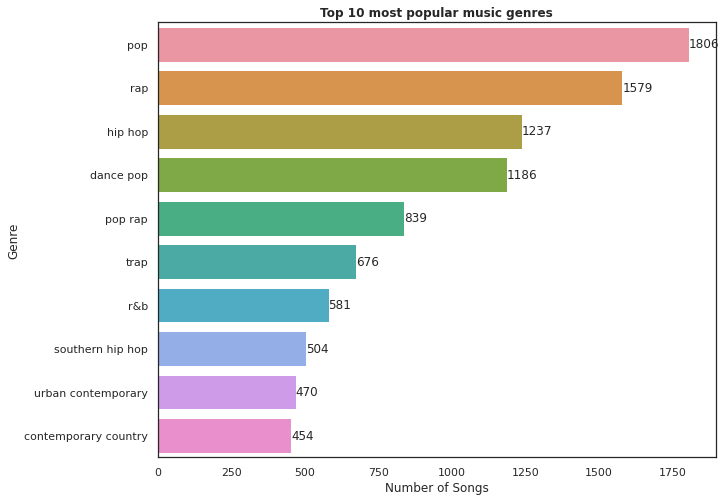

In [61]:
# create a bar plot using seaborn
sns.set_style("white")
sns.set_palette("husl", 8)
plt.figure(figsize=(10, 8))
sns.barplot(x='number', y='genre', data=genre.head(10))
plt.xlabel('Number of Songs')
plt.ylabel('Genre')
plt.title('Top 10 most popular music genres', fontweight='bold')

# loop through the DataFrame and add text labels next to each bar
for i, row in genre.head(10).iterrows():
    plt.text(row['number'], i, row['number'], ha='left', va='center')

plt.show()

In [75]:
# create a new column with the first artist name
df['first_artist'] = df['Artist'].str.split(',', expand=True)[0]

# group by the first artist and find the sum of PopularityScore
popularity_by_artist = df.groupby(['first_artist'])['PopularityScore'].sum()

# sort the series in descending order
popularity_by_artist = popularity_by_artist.sort_values(ascending=False)

# print the top 10 artist by views
popularity_by_artist.head(10)

first_artist
Drake            5845
Taylor Swift     5821
The Weeknd       4276
Morgan Wallen    3870
Kanye West       3493
Eminem           3263
Rihanna          3078
SZA              2666
Juice WRLD       2173
Linkin Park      2100
Name: PopularityScore, dtype: int64

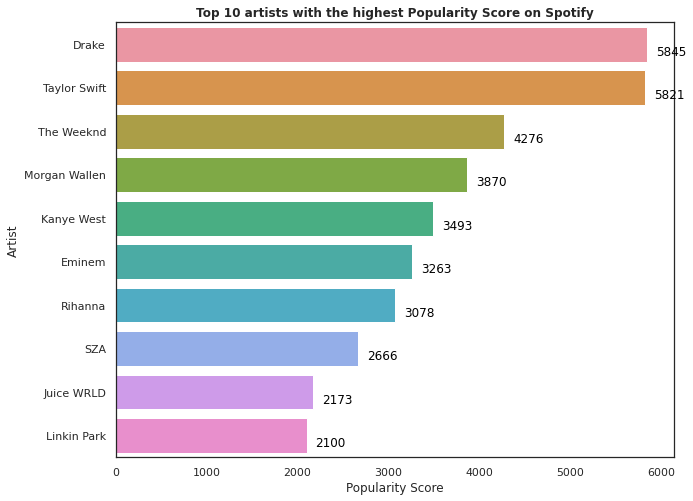

In [97]:
# create a bar plot using seaborn
sns.set_style("white")
sns.set_palette("husl", 8)
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=popularity_by_artist[:10], y=popularity_by_artist.index[:10])
ax.set_xlabel('Popularity Score')
ax.set_ylabel('Artist')
ax.set_title('Top 10 artists with the highest Popularity Score on Spotify', fontweight='bold')

# loop through the top 10 artists and add the popularity score as a label above each bar
for i, v in enumerate(popularity_by_artist[:10]):
    ax.text(v + 100, i + .25, str(v), color='black')
    
plt.show()


In [98]:
# group by the first artist and find the sum of like
like_by_artist = df.groupby(['first_artist'])['likeCount'].sum()

# sort the series in descending order
like_by_artist = like_by_artist.sort_values(ascending=False)

# print the top 10 artist by like
like_by_artist.head(10)

first_artist
Justin Bieber    196976652
Ed Sheeran       146077779
Taylor Swift     141482198
Eminem           131298118
The Weeknd       116941432
Billie Eilish    112387749
Ariana Grande    106630778
XXXTENTACION      95958916
Katy Perry        95862812
Bruno Mars        86921183
Name: likeCount, dtype: int64

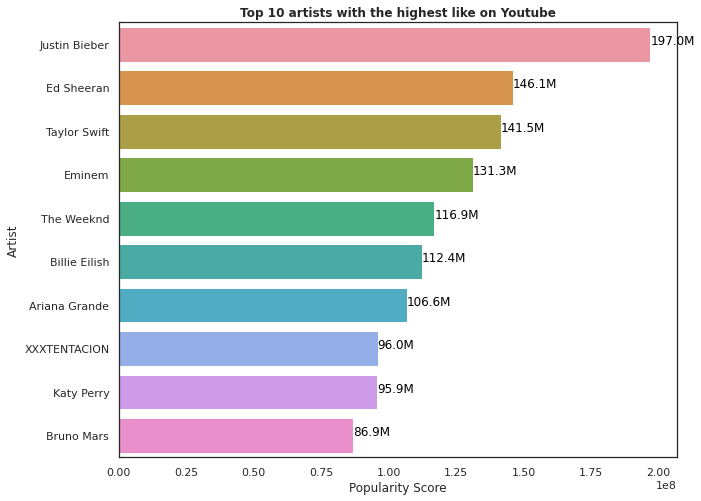

In [99]:
# create a bar plot using seaborn
sns.set_style("white")
sns.set_palette("husl", 8)
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=like_by_artist[:10], y=like_by_artist.index[:10])
ax.set_xlabel('Popularity Score')
ax.set_ylabel('Artist')
ax.set_title('Top 10 artists with the highest like on Youtube', fontweight='bold')

# loop through the top 10 artists and add the like as a label above each bar
for i, v in enumerate(like_by_artist[:10]):
    ax.text(v, i, '{:.1f}M'.format(v/1000000), color='black')
    
plt.show()